In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bluebook-for-bulldozers/Valid.7z
/kaggle/input/bluebook-for-bulldozers/Valid.zip
/kaggle/input/bluebook-for-bulldozers/Train.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv
/kaggle/input/bluebook-for-bulldozers/median_benchmark.csv
/kaggle/input/bluebook-for-bulldozers/Valid.csv
/kaggle/input/bluebook-for-bulldozers/Machine_Appendix.csv
/kaggle/input/bluebook-for-bulldozers/random_forest_benchmark_test.csv
/kaggle/input/bluebook-for-bulldozers/Data Dictionary.xlsx
/kaggle/input/bluebook-for-bulldozers/ValidSolution.csv
/kaggle/input/bluebook-for-bulldozers/Test.csv
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.7z
/kaggle/input/bluebook-for-bulldozers/Train.7z


# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we are building an ML model with the goal of predicting the sale price of bulldozers.

The data and evaluation metric we'll be using is from Kaggle Competition [Blue Book for Bulldozers](https://www.kaggle.com/c/bluebook-for-bulldozers/overview)

## 1. Problem Definition

> How well can we predict the future sale price of a bulldozer, given its characteristic previous examples of how much similar bulldozers have been sold for?

## 2. Data

Looking at the [dataset from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data), we can see it's a time series problem.

In this case, it's a historical sales data of bulldozers. Including details like model type, size, sale data and more.

There are 3 datasets:

1. **Train.csv** - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including `SalePrice` which is the **target variable**).

2. **Valid.csv** - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as Train.csv)

3. **Test.csv** - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but without `SalePrice` column which is our **target variable**).

## 3. Evaluation

For this problem, [Kaggle](www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation) has set the evaluation metric to being root mean square log error (RMSLE). As with many regression evaluations, the goal will be to reduce this metric value as low as possible.

To see how well our model is doing, we'll calculate the RMSLE and then compare our results to others on the Kaggle leaderboard.

## 4. Features

> Data Dictionary: Primary information of the features as provided by Kaggle

|Sr. | Feature | Descriptions |
|----|---------|--------------|
|1|SalesID|unique identifier of a particular sale of a machine at auction|
|2|MachineID|  identifier for a particular machine;  machines may have multiple sales|
|3|ModelID|  identifier for a unique machine model (i.e. fiModelDesc)|
|4|datasource|  source of the sale record;  some sources are more diligent about reporting attributes of the machine than others.  Note that a particular datasource may report on multiple auctioneerIDs.|
|5|auctioneerID|  identifier of a particular auctioneer, i.e. company that sold the machine at auction.  Not the same as datasource.|
|6|YearMade|  year of manufacturer of the Machine|
|7|MachineHoursCurrentMeter|  current usage of the machine in hours at time of sale (saledate);  null or 0 means no hours have been reported for that sale|
|8|UsageBand|  value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel;  e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel.|
|9|Saledate|  time of sale|
|10|Saleprice|  cost of sale in USD|
|11|fiModelDesc|  Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor|
|12|fiBaseModel|  disaggregation of fiModelDesc|
|13|fiSecondaryDesc|  disaggregation of fiModelDesc|
|14|fiModelSeries|  disaggregation of fiModelDesc|
|15|fiModelDescriptor|  disaggregation of fiModelDesc|
|16|ProductSize|The size class grouping for a product group. Subsets within product group.|
|17|ProductClassDesc|  description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc|
|18|State|  US State in which sale occurred|
|19|ProductGroup|  identifier for top-level hierarchical grouping of fiModelDesc|
|20|ProductGroupDesc|  description of top-level hierarchical grouping of fiModelDesc|
|21|Drive_System|machine configuration;  typcially describes whether 2 or 4 wheel drive|
|22|Enclosure|machine configuration - does machine have an enclosed cab or not|
|23|Forks|machine configuration - attachment used for lifting|
|24|Pad_Type|machine configuration - type of treads a crawler machine uses|
|25|Ride_Control|machine configuration - optional feature on loaders to make the ride smoother|
|26|Stick|machine configuration - type of control|
|27|Transmission|machine configuration - describes type of transmission;  typically automatic or manual|
|28|Turbocharged|machine configuration - engine naturally aspirated or turbocharged|
|29|Blade_Extension|machine configuration - extension of standard blade|
|30|Blade_Width|machine configuration - width of blade|
|31|Enclosure_Type|machine configuration - does machine have an enclosed cab or not|
|32|Engine_Horsepower|machine configuration - engine horsepower rating|
|33|Hydraulics|machine configuration - type of hydraulics|
|34|Pushblock|machine configuration - option|
|35|Ripper|machine configuration - implement attached to machine to till soil|
|36|Scarifier|machine configuration - implement attached to machine to condition soil|
|37|Tip_control|machine configuration - type of blade control|
|38|Tire_Size|machine configuration - size of primary tires|
|39|Coupler|machine configuration - type of implement interface|
|40|Coupler_System|machine configuration - type of implement interface|
|41|Grouser_Tracks|machine configuration - describes ground contact interface|
|42|Hydraulics_Flow|machine configuration - normal or high flow hydraulic system|
|43|Track_Type|machine configuration - type of treads a crawler machine uses|
|44|Undercarriage_Pad_Width|machine configuration - width of crawler treads|
|45|Stick_Length|machine configuration - length of machine digging implement|
|46|Thumb|machine configuration - attachment used for grabbing|
|47|Pattern_Changer|machine configuration - can adjust the operator control configuration to suit the user|
|48|Grouser_Type|machine configuration - type of treads a crawler machine uses|
|49|Backhoe_Mounting|machine configuration - optional interface used to add a backhoe attachment|
|50|Blade_Type|machine configuration - describes type of blade|
|51|Travel_Controls|machine configuration - describes operator control configuration|
|52|Differential_Type|machine configuration - differential type, typically locking or standard|
|53|Steering_Controls|machine configuration - describes operator control configuration

### Let's import the data and Explore

In [2]:
# Import the training and validation set
df = pd.read_csv('/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

> dtype of `saledate` column is object, hence dates are not parsed.

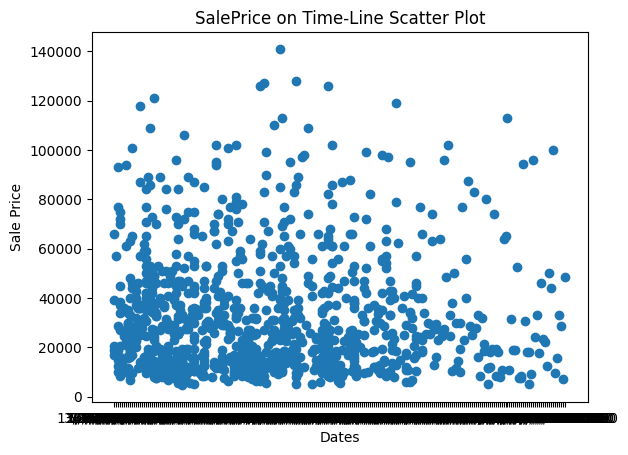

In [4]:
plt.scatter(x=df['saledate'][:1000], y=df['SalePrice'][:1000])
plt.xlabel('Dates')
plt.ylabel('Sale Price')
plt.title('SalePrice on Time-Line Scatter Plot');

### Parsing Dates

When working with time series data, it's a good idea to make sure any date data is in the `datetime` format (a Python data type which encodes specific information about dates).

In [5]:
df = pd.read_csv('/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])
df.saledate.info()

<class 'pandas.core.series.Series'>
RangeIndex: 412698 entries, 0 to 412697
Series name: saledate
Non-Null Count   Dtype         
--------------   -----         
412698 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.1 MB


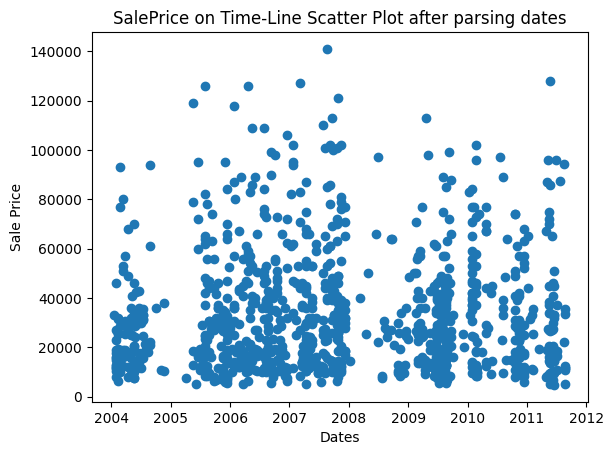

In [6]:
plt.scatter(x=df['saledate'][:1000], y=df['SalePrice'][:1000])
plt.xlabel('Dates')
plt.ylabel('Sale Price')
plt.title('SalePrice on Time-Line Scatter Plot after parsing dates');

In [7]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [8]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

Dates in the `saledate` column are random.
As we're working on a time-series problem and trying to predict future examples given past examples, it makes sense to sort our data by date.

### Sort DataFrame by saledate

In [9]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

Since we're going to be manipulating the data, we'll make a copy of the original DataFrame and perform our changes there, keeping original DataFrame in-tact.

In [10]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

### Adding datetime parameters for `saledate` column

This will enable us to access the different datetime attributes of the `saledate` column.

In [11]:
# Add datetime parameters for saledate
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayofweek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayofyear'] = df_tmp.saledate.dt.dayofyear

# Drop original saledate
df_tmp.drop('saledate', axis=1, inplace=True)

In [12]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Let's explore other columns

In [13]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

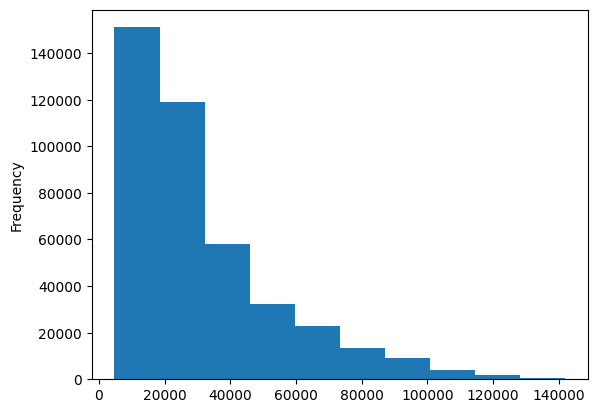

In [14]:
df_tmp.SalePrice.plot.hist();

We notice an inverse relationship between SalePrice and sale frequency. 

<Axes: >

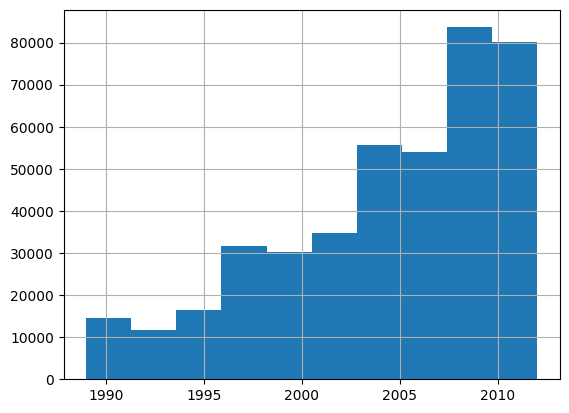

In [15]:
df_tmp.saleYear.hist(bins=df_tmp.saleYear.unique().sort())

Text(0.5, 0, 'Year')

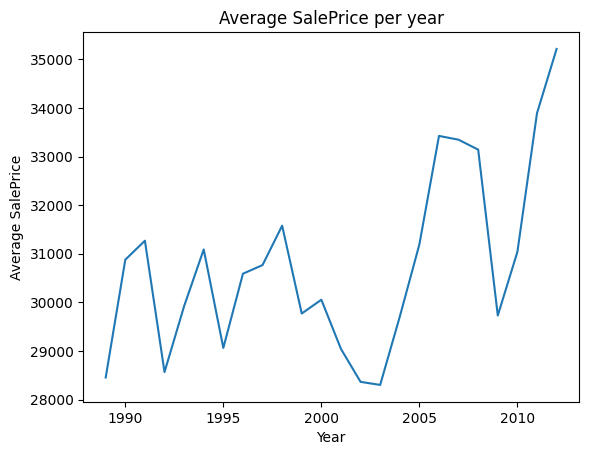

In [16]:
x=df_tmp.saleYear.unique()
y = df_tmp.SalePrice.groupby(by=df_tmp['saleYear']).mean()
plt.plot(x, y)
plt.title('Average SalePrice per year')
plt.ylabel('Average SalePrice')
plt.xlabel('Year')

Sales frequency as well as average sale price show a positive trend.

## 5. Modelling

After exploring our dataset a little and enriching it with some datetime attributes, now let's try to model.

Since our data contains plenty of features related to the machine configuration, we'll proceed to model driven EDA.

Following the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), we find a [`RandomForestRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor) might be a good candidate.

For ML models we need:
> 1) All of our data to be numerical

> 2) There shouldn't be any missing values

### Missing Values and Different datatypes

In [17]:
# Check different datatypes
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [18]:
# Check for missing values
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convert Strings to categories

One way to help turn all of our data into numbers is to convert the columns with the string(object) datatype into a `category` datatype by using `pandas types api` for data manipulation. This method is later used while filling missing values.

In [19]:
# These columns contain strings
print('Columns with string dtype')
print('-----------------------------------')
count = 0
for label, content in df_tmp.items():
    if content.dtype == 'object':
        print(label)
        count += 1
print('-----------------------------------')
print(f'Total columns with string dtype = {count}')

Columns with string dtype
-----------------------------------
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
-----------------------------------
Total columns with string dtype = 44


In [20]:
# This will turn all of the string values into category values

for label, content in df_tmp.items():
    if content.dtype == 'object':
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [21]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [22]:
df_tmp.Tip_Control.cat.codes.unique()

array([-1,  1,  0,  2], dtype=int8)

Pandas encodes missing categories as '-1'.

In [23]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [24]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

All of our string data has been converted to categorical and thus we can now turn the categories into numbers, however it's still missing values.

In [25]:
# Missing values percentage
df_tmp.isnull().sum()*100/len(df_tmp)

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

### Fill missing values

#### Filling numerical values first
strategy -> median of that column
(since median is more robust than mean)

In [26]:
count = 0
for label, content in df_tmp.items():
    if pd.api.types.is_any_real_numeric_dtype(content):
        print(label)
        count+=1
print(f'Total no of numeric columns = {count}')

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofweek
saleDayofyear
Total no of numeric columns = 13


In [27]:
# Check for which numeric columns have missing values
count = 0
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            count += 1
print(f'There are {count} columns with missing values')

auctioneerID
MachineHoursCurrentMeter
There are 2 columns with missing values


In [28]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing or not
            df_tmp[label+'_is_missing'] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

Why add a binary column indicating whether the data was missing or not?

We can easily fill all of the missing numeric values in our dataset with the median. However, a numeric value may be missing for a reason. Adding a binary column which indicates whether the value was missing or not helps to retains this information.

In [29]:
# Check if there's is any null numeric columns
count = 0
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            count += 1
print(f'There are {count} columns with missing values')

There are 0 columns with missing values


In [30]:
# Check to see how many examples were missing in `auctioneerID` column
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

#### Filling and turning categorical variables to numbers

Now we've filled the numeric values, we'll do the same with the categorical values at the same time as turning them into numbers.

In [31]:
# Check columns which aren't numeric ie. they are categorical
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [32]:
# Turn categorical variables into numbers
for label, content in df_tmp.items():
    # Check columns which aren't numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+'_is_missing'] = pd.isnull(content)
        # We add +1 because pandas encodes missing categories as -1
        df_tmp[label] = pd.Categorical(content).codes+1

In [33]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


In [34]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [35]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


Now all of our data is numeric and there are no missing values, we should be able to build a machine learning model.

### Splitting data into train and validation sets

In [36]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


According to this Kaggle competition [data page](https://www.kaggle.com/c/bluebook-for-bulldozers/data), the validation set and test set are split according to dates.

Knowing this, randomly splitting our data into train and test sets using train_test_split() would not work.

Instead, we split our data into, training and test sets using the date each sample occured.

In our case:
* Training   -> all samples up until 2011
* Validation -> all samples from Jan 1,2012 - Apr 30,2012
* Test       -> All samples from May 1, 2012 - Nov 2012

In [37]:
df_tmp.saleYear.value_counts().sort_index()

saleYear
1989     4806
1990     4529
1991     5109
1992     5519
1993     6303
1994     7929
1995     8530
1996     8829
1997     9785
1998    13046
1999    12793
2000    17415
2001    17594
2002    17246
2003    15254
2004    19879
2005    20463
2006    21685
2007    32208
2008    39767
2009    43849
2010    33390
2011    35197
2012    11573
Name: count, dtype: int64

In [38]:
# Split data into training and valiation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_train), len(df_val)

(401125, 11573)

In [39]:
# Split data into X and y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

According to competition rules, the evaluation function is Root mean squared log error (RMSLE).

In Scikit-Learn we don't have an in-built function for RMSLE, we'll create our own.

We can do this by taking the square root of Scikit-Learn's mean_square_log_erro (MSLE).

Let's also calculate MAE and R^2.

In [40]:
# Create evaluation function 
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_pred):
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

# Create function to evaluate our model
def show_scores(model):
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_valid)
    scores = {'Training MAE': mean_absolute_error(y_train, train_pred),
              'Valid MAE': mean_absolute_error(y_valid, val_pred),
              'Training RMSLE': rmsle(y_train, train_pred),
              'Valid RMSLE': rmsle(y_valid, val_pred),
              'Training R2': model.score(X_train, y_train),
              'Valid R2': model.score(X_valid, y_valid)}
    return scores

### Testing our model on a subset (to tune the hyperparameters)

We will take a sample of the training set and tune the hyperparameters on that before training a larger model, to speed up our experimentation efforts.

In [41]:
len(X_train)

401125

Let's alter the number of samples each 'n_estimator' in the `RandomForestRegressor` sees using the max_samples parameter.

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model
model = RandomForestRegressor(n_jobs=-1, max_samples=20000)

# Fit the model
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=20000, n_jobs=-1)

In [43]:
# Evaluate the model
show_scores(model)

{'Training MAE': 5040.130322542847,
 'Valid MAE': 6759.460941847404,
 'Training RMSLE': 0.23643958468016193,
 'Valid RMSLE': 0.2796271171625919,
 'Training R2': 0.8834789132842487,
 'Valid R2': 0.8495646996661051}

### Hyperparameter Tuning with RandomizedSearcCV

In [44]:
from sklearn.model_selection import RandomizedSearchCV

# RFR hyperparameters
rf_grid = {'n_estimators': np.arange(10, 100, 10),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2),
          'max_features': [0.5, 1, 'sqrt', 'log2'],
          'max_samples': [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                             param_distributions=rf_grid,
                             n_iter=25,
                             cv=5,
                             verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=25,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [45]:
#Find the best parameters from the RandomizedSearch
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [46]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 6104.545412277967,
 'Valid MAE': 7610.7871813704305,
 'Training RMSLE': 0.27903738145490364,
 'Valid RMSLE': 0.30952122559006257,
 'Training R2': 0.8347255450713424,
 'Valid R2': 0.8184946280056709}

Evaluation metrics of our first model are better than RandomizedSearch model.

Let's try RandomizedSearch one more time with n_iters=100 and max_samples=20000

In [47]:
rf_grid = {'n_estimators': np.arange(10, 100, 10),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2),
          'max_features': [0.5, 1, 'sqrt'],
          'max_samples': [20000]}

rs_model_2 = RandomizedSearchCV(RandomForestRegressor(),
                             param_distributions=rf_grid,
                             n_iter=100,
                             cv=5,
                             verbose=True)

rs_model_2.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [20000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [48]:
rs_model_2.best_params_

{'n_estimators': 60,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_samples': 20000,
 'max_features': 0.5,
 'max_depth': None}

In [53]:
show_scores(rs_model_2)

{'Training MAE': 5323.287213474667,
 'Valid MAE': 6785.106205894764,
 'Training RMSLE': 0.24660221263196982,
 'Valid RMSLE': 0.2775029481788447,
 'Training R2': 0.8708339497271699,
 'Valid R2': 0.8472173064982768}

Let's train a new models with first model params and rs_model_2 params with all training data. Let's raise n_estimators for rs_model to 90.

In [54]:
# Instantiate model
model_3 = RandomForestRegressor(n_jobs=-1)
model_4 = RandomForestRegressor(n_jobs=-1,
                               n_estimators=90,
                               min_samples_split=4,
                               min_samples_leaf=1,
                               max_features=0.5,
                               max_depth=None)

# Fit the model
model_3.fit(X_train, y_train)
model_4.fit(X_train, y_train)

# Evaluate our models
print('----------------------------------')
print('Model_3 scores:\n', show_scores(model_3))
print('----------------------------------')
print('Model_4 scores:\n', show_scores(model_4))
print('----------------------------------')

----------------------------------
Model_3 scores:
 {'Training MAE': 1579.7177881957, 'Valid MAE': 6128.926689708806, 'Training RMSLE': 0.08422696576161363, 'Valid RMSLE': 0.255130461967753, 'Training R2': 0.9875107248378534, 'Valid R2': 0.8724379882826178}
----------------------------------
Model_4 scores:
 {'Training MAE': 1798.1467670713487, 'Valid MAE': 5905.781946457091, 'Training RMSLE': 0.09476516839263295, 'Valid RMSLE': 0.2456061918344471, 'Training R2': 0.9838631469633686, 'Valid R2': 0.8840040860989582}
----------------------------------


By comparing scores of 3 models, model_4 has given highest scores. Let's proceed with model_4

Now we've got a trained model, it's time to make predictions on the test data.

## 6. Making Predictions of Test data

Our model is trained on data prior to 2011. However, the test data is from May 01, 2012 to November 2012.
So we are trying to use the patterns our model has learned in the training data to predict the sale price of a Bulldozer with characteristics it's never seen before but are assumed to be similar to that of those in the training data.

In [55]:
df_test = pd.read_csv('/kaggle/input/bluebook-for-bulldozers/Test.csv', parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing the test data

In [56]:
# Let's create a function for preprocessing test data

def preprocess_data(df):
    # Add datetime parameters for saledata
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayofweek'] = df.saledate.dt.dayofweek
    df['saleDayofyear'] = df.saledate.dt.dayofyear
    
    # Drop original saledate
    df.drop('saledate', axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+'_is_missing'] = pd.isnull(content)
                df[label] = content.fillna(content.median())
        
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing'] = pd.isnull(content)
            # Add +1 because pandas encode missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [57]:
# Let's preprocess the test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [58]:
X_train.shape

(401125, 102)

Our X_train had 102 columns but our test dataframe after preprocessing contains 101 columns.

Let's find the difference.

In [59]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

Since, test dataset wasn't missing any `auctioneerID` field, our preprocessing function couldn't create `auctioneerID_is_missing` column.

To fix this, we'll add a column to the test dataset called `auctioneerID_is_missing` and fill it with False, since no of the `auctioneerID` fields are missing in the test dataset.

In [60]:
# Match test dataset columns to training dataset
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [61]:
# Let's set the order of the columns in our test dataset and match it with X_train
df_test = df_test[X_train.columns]

In [62]:
# Make predictions on the test dataset using the best model
test_pred = model_4.predict(df_test)

As per [Kaggle Submission Requirements](www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation), we need submission data in the csv file containing `SalesID` and the predicted `SalePrice` of the bulldozer.

In [63]:
# Create DataFrame compatible with Kaggle submission requirements
df_pred = pd.DataFrame()
df_pred['SalesID'] = df_test['SalesID']
df_pred['SalePrice'] = test_pred
df_pred

,SalesID,SalePrice
0,1227829,17849.695767
1,1227844,17474.398148
2,1227847,49578.505291
3,1227848,69701.008598
4,1227863,56428.219577
...,...,...
12452,6643171,38401.203704
12453,6643173,12804.871693
12454,6643184,13945.123457
12455,6643186,17452.171517


In [64]:
# Export to csv
df_pred.to_csv('/kaggle/working/bulldozer_pred.csv', index=False)

## Feature Importance

Let's see which bulldozer sale attributes were most important for predicting its overall sale price as per RandomForest model

In [65]:
# Find feature importance of our best model
model_4.feature_importances_

array([3.56882292e-02, 2.20017752e-02, 4.38905567e-02, 1.93224381e-03,
       4.73171753e-03, 1.94633986e-01, 3.85254406e-03, 1.36956789e-03,
       3.91581153e-02, 4.68948245e-02, 6.63136864e-02, 4.64676062e-03,
       2.12441977e-02, 1.38821156e-01, 4.41716658e-02, 8.65404300e-03,
       1.64741187e-03, 3.74876037e-03, 2.96727051e-03, 5.82977722e-02,
       6.97092639e-04, 4.40444358e-05, 1.45583434e-03, 1.90465128e-04,
       1.19065760e-03, 2.79644654e-05, 2.63271700e-03, 1.85470321e-03,
       3.97775182e-03, 1.02290241e-04, 4.78040550e-03, 4.97417078e-03,
       3.75550026e-03, 6.53913593e-04, 2.88227554e-03, 9.56792684e-03,
       1.06088074e-03, 1.01435443e-02, 1.83683705e-03, 1.25828311e-03,
       7.33418477e-04, 1.09361389e-03, 3.76942523e-03, 8.33908685e-04,
       8.60749995e-04, 4.87527619e-04, 2.55358071e-04, 3.13799018e-03,
       1.07518964e-03, 2.64346251e-04, 6.43958318e-04, 7.35742214e-02,
       5.71008052e-03, 8.97757673e-03, 4.73629770e-03, 1.30533454e-02,
      

In [66]:
# Let's create a function for plotting feature importance
import seaborn as sns

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,
                       'feature_importance': importances})
         .sort_values('feature_importance', ascending=False)
         .reset_index(drop=True))
    
    sns.barplot(x='feature_importance',
               y='features',
               data=df[:n],
               orient='h')

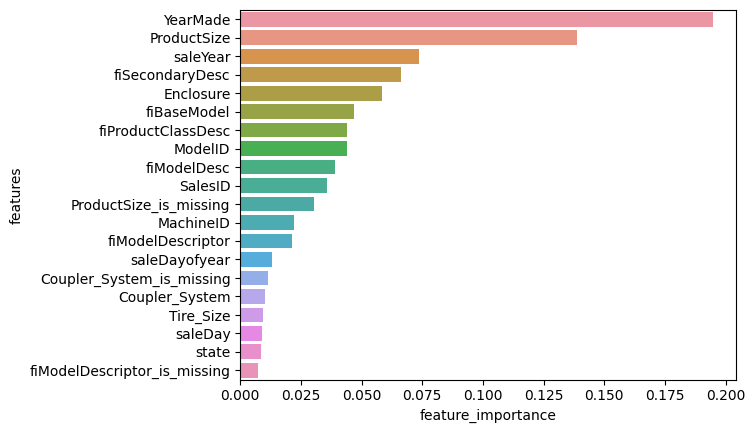

In [67]:
plot_features(X_train.columns, model_4.feature_importances_)

Above chart shows top 20 importance features as per our best model.